Data Science Project Individual Planning Stage 

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Dataset: players

Number of observations: 196 (each row represents a different player)

Number of variables: 7

Variables (Name, Type of Variable, Description):

            1) experience, character, a player's experience level including different types of levels: Beginner, Amateur, Regular, Veteran, Pro 
            
            2) subscribe, logical, a TRUE / FALSE of whether the player is subscribed
            
            3) hashedEmail, character, unique identifier for each player 
            
            4) played_hours, numeric, total hours each player has played 
            
            5) name, character, each player's display name
            
            6) gender, character, each player's gender including Male, Female, Non-binary, Prefer not to say, Other, Two-Spirited
            
            7) Age, numeric, each player's age in years

Potential issues: there may be duplicate names, there may be outliers in variables that could have extreme values such as played_hours

In [4]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Dataset: sessions 

Number of observations: 1535 (each row represents a different player)

Number of variables: 5

Variables (Name, Type of Variable, Description):

            1) hashedEmail, character, unique identifier for each player
            
            2) start_time, character / datetime, starting time of the session formatted as DD/MM/YYY HH:MM
            
            3) end_time, character / datetime, ending time of the session formatted as DD/MM/YYY HH:MM 
            
            4) original_start_time, numeric, official timestamp for the start of the session (in milliseconds)
            
            5) original_end_time, numeric, official timestamp for the end of the session (in milliseconds)

Potential issues: the start_time and original_start_time values as well as the end_time and original_end_time have to match otherwise the data is inaccurate. The original start and end time variables have very large values so it could be more difficult to analyze the data - a potential solution could be converting the values to seconds or hours to reduce the number. 

In [5]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

(2)Questions: 

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Can a player’s age predict the total amount of data they will contribute to the MineCraft server as measured by the played_hours variable in the "players.csv" dataset?

Variables: 

            1) response variable: played_hours, numeric value which represents the total play time of each player.
            
            2) explanatory variable: age, numeric value which represents the age of the player.

The data in the "players" dataset will be used to address the specific question using the values found in the Age variable and the played_hours variable to examine whether age can predict the hours spent playing. To begin, I will ensure there are no missing values in these variables by removing any rows containing NA values. 


(3)Exploratory Data Analysis and Visualization 

In [6]:
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
players <- drop_na(players, Age, played_hours)
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [10]:
mean_age <- mean(players[["Age"]], na.rm = TRUE)
mean_played_hours <- mean(players[["played_hours"]], na.rm = TRUE)

mean_age
mean_played_hours

[1] 21.13918

[1] 5.904639

|  Variable      |  Mean      |

|-----------------------------|

|  Age           |  21.13918  |

| played_hours   |  5.9046392 | 

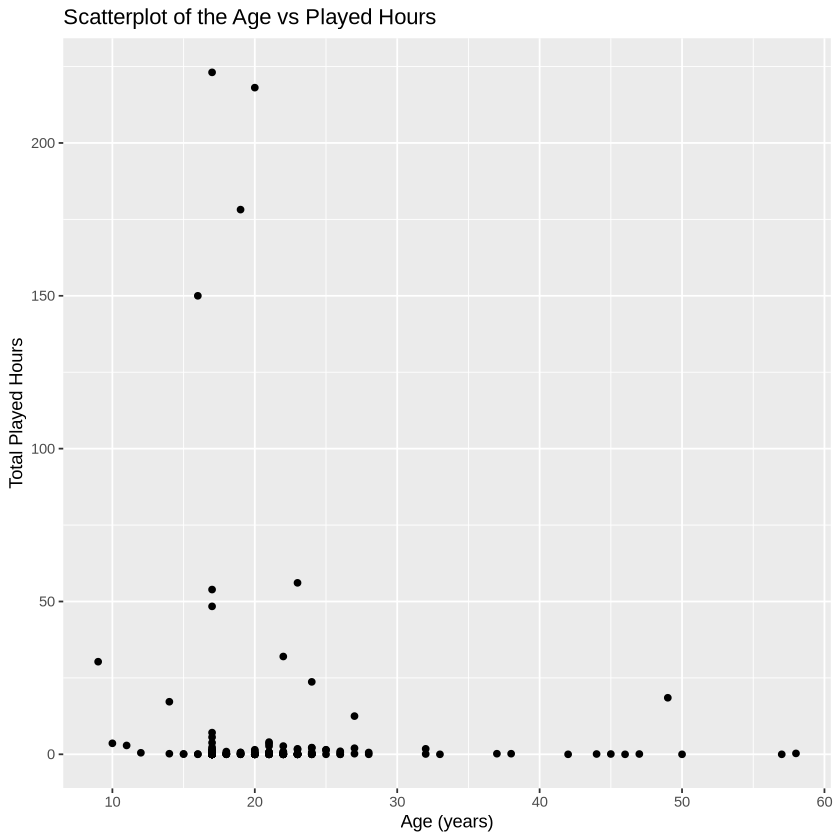

In [11]:
players_scatter <- ggplot(players, aes(x = Age, y = played_hours)) +
                geom_point() +
                labs(x = "Age (years)", 
                     y = "Total Played Hours",
                     title = "Scatterplot of the Age vs Played Hours")
players_scatter

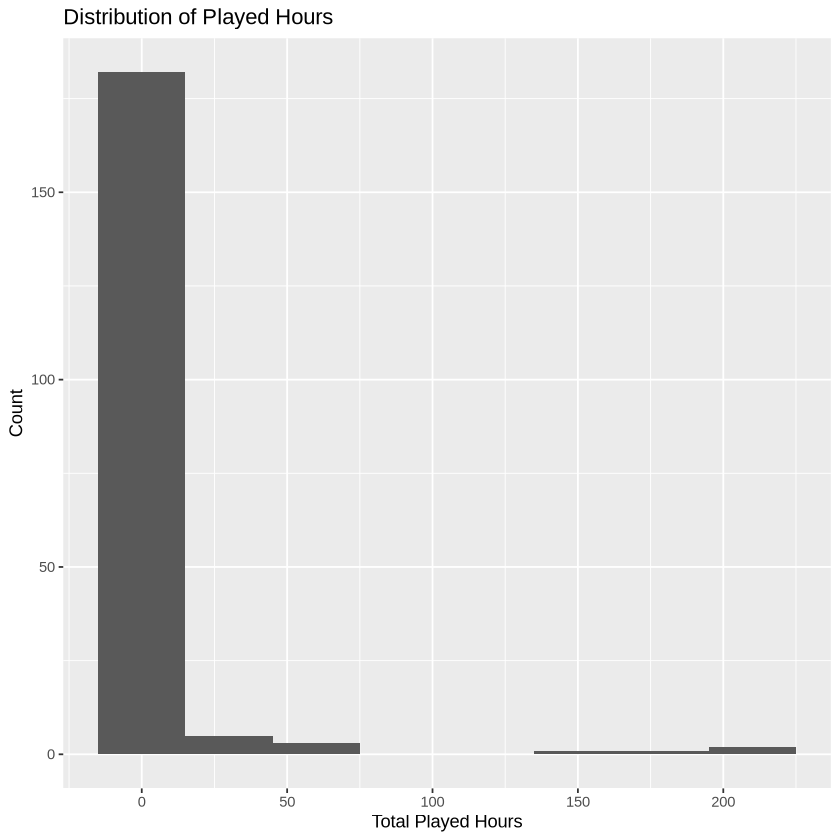

In [16]:
players_histogram <- ggplot(players, aes(x = played_hours)) +
                    geom_histogram(binwidth = 30) +
                    labs(x = "Total Played Hours",
                         y = "Count",
                         title = "Distribution of Played Hours")

players_histogram

Analysis:

The scatterplot shows that the majority of players have low playing hours, regardless of age, there does not appear to be a clear linear relationship between the two variables. However, there are a few younger players with high playing hours which creates outliers. Overall, it suggests th 

The histogram is heavily left-skewed which shows that the majority of players have low played_hours, wiht only few having high playing hours. This can affect correlation as the data is not evenly distributed. The players that have high playing hours could be seen as outliers and influence regression, making it less representative of the average player. 